# Data analytics

## Bayesian basics

### dr hab. inż. Jerzy Baranowski, Prof. AGH

## Bayes' rule
In most applicatations we focus on the numerator

$$ \underbrace{p(\theta|y)}_{\mathrm{posterior}}\propto 
\underbrace{p(\theta)}_{\mathrm{prior}}
\underbrace{p(y|\theta)}_{\mathrm{likelihood}}$$


## Predictions

### Prior predictive distribution

What values of data can we expect before actual measurements (based on prior knowledge)

$$
p(y)=\int p(y,\theta) d\theta=\int p(\theta)p(y|\theta)d\theta
$$

## Predictions

### Posterior predictive distribution

What values of new data can we expect based on previous measurements and prior knowledge

$$
p(\tilde{y}|y)=\int p(\tilde{y},\theta|y) d\theta=
\int p(\tilde{y}|\theta,y) p(\theta|y)d\theta=
\int p(\tilde{y}|\theta) p(\theta|y)d\theta
$$

## Additional notation and properties
### Everything is conditional
$$p(\theta,y|H)=p(\theta|H)p(y|\theta,H)$$

### Expectation
$$ \mathrm{E}(u)=\int up(u) d u $$

### Variance
$$ \mathrm{var}(u)=\int(u-\mathrm{E}(u))(u-\mathrm{E}(u))^T p(u) du$$

## Conditional expectations and variances
### Expectation of conditional distribution
$$ \mathrm{E}(u)=\mathrm{E}(\mathrm{E}(u|v)) $$
$$ \mathrm{E}(u)=\iint u p(u,v) du dv =\iint u p(u|v) du p(v) dv=\int  \mathrm{E}(u|v)p(v)d v $$
### Variance of conditional distribution
$$ \mathrm{var}(u)=\mathrm{E}(\mathrm{var}(u|v))+\mathrm{var}(\mathrm{E}(u|v) $$

## Changing variables
$$ v=f(u) $$
### Discrete distributions
$$
p_v(v)=p_u(f^{-1}(v))
$$

## Continuous distributions
$$
p_v(v)=|J|p_u(f^{-1}(v))
$$

## Typical variable changes
It is useful to work on the unbounded interval i.e. $(-\infty,\infty)$. Often parameters are bounded, so we use transformations

- Logarithmic (from $(0,\infty)\rightarrow (-\infty,\infty)$)
$$ v=\log(u)$$
- Logistic (from $(0,1)\rightarrow (-\infty,\infty)$)
$$ v=\mathrm{logit}(u) $$
where 
$$ \mathrm{logit}(x)=\log\left(\frac{x}{1-x}\right),\quad
\mathrm{logit}^{-1}(y)=\frac{\exp(y)}{1+\exp(y)}$$

- Probit (from $(0,1)\rightarrow (-\infty,\infty)$)
$$ v=\Phi^{-1}(u) $$
where $\phi$ is the standard normal cumulative distribution function

## Single parameter models
### Building blocks of more complicated models
### Answers to basic questions e.g.:
- What is the average difference between treatment groups?
- How strong is the association between a treatment and an outcome?
- Does the effect of the treatment depend upon a covariate?
- How much variation is there among groups?

## Binomial model

- Natural model for data that arise from a sequence of $n$ exchangeable trials 
- Two possible outcomes, conventionally labeled ‘success’ and ‘failure.’
$$
p(y|\theta)=\mathrm{Bin}(y|n,\theta)={n \choose y}\theta^y (1-\theta)^{n-y}
$$


## Example of Bayesian learning
Globe tossing:
- The true proportion of water covering the globe is p.
- A single toss of the globe has a probability $p$ of producing a water (W) observation.
- It has a probability $1 − p$ of producing a land (L) observation. 
- Each toss of the globe is independent of the others.

## Globe tossing likelyhood

In [2]:
import scipy.stats as stats
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
theta=np.linspace(0,1,200)
#sns.set(style='darkgrid')

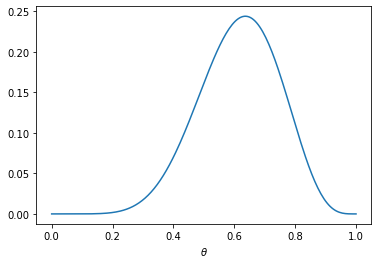

In [3]:
y=7
n=11
likelihood = stats.binom.pmf(y, n, theta)
plt.plot(theta,likelihood)
plt.xlabel(r'$\theta$')
plt.show()

## How does it look analytically?
Posterior distribution with uniform prior takes form
$$ p(\theta|y)\propto \theta^y (1-\theta)^{n-y}$$
Which has form of Beta distribution
$$ \theta|y\sim \mathrm{Beta} (y+1,n-y+1)$$

## How to summarize posterior?
- Ideally – by itself
- Usually – mean, median, mode
- Variation – standard deviation, the interquartile range, and other quantiles

## Interval summaries
- Central interval - a symmetric interval around for example a mean
- Highest posterior density region - smallest interval containing the desired probability

<img src="img/intervals.png" width="500">


## Priors
- **population interpretation**, the prior distribution represents a population of possible parameter values, from which the $\theta$ of current interest has been drawn
- **state of knowledge interpretation**, we must express our knowledge (and uncertainty) about $\theta$ as if its value could be thought of as a random realization from the prior distribution

## Informative priors
- They try to introduce new information
- Often interpreted as knowledge from previous experiments
- For binomial example
$$ p(\theta)\propto \theta^{\alpha-1}(1-\theta)^{\beta-1}$$
It’s a Beta distribution $\theta \sim \mathrm{Beta}(\alpha, \beta)$, prior density is equivalent to $\alpha − 1$ prior successes and $\beta − 1$ prior failures.

## Posterior with informative prior
Posterior has a closed form
$$
\begin{aligned}
p(\theta|y)\propto{}& \theta^{y}(1-\theta)^{n-y}\theta^{\alpha-1}(1-\theta)^{\beta-1}=\\
={}&\theta^{y+\alpha-1}(1-\theta)^{n-y+\beta-1}=\\
={}&\mathrm{Beta}(\alpha+y,\beta+n-y)
\end{aligned}
$$
With expectation
$$
\mathrm{E}(\theta|y)=\frac{\alpha+y}{\alpha+\beta+n}
$$
which always lies between the sample proportion, $y/n$, and the prior mean, $\alpha/(\alpha + \beta)$

## Conjugacy
$$ p(\theta|y)\in\mathcal{P}\mathrm{for\ all}\ p(\cdot|\theta)\in\mathcal{F}\ \mathrm{and}\ p(\cdot)\in\mathcal{P}
$$

Class $\mathcal{P}$ is conjugate to class $\mathcal{F}$

- Conjugacy makes everything easier, formulas are analytic so computation is faster
- It should not be a goal by itself, as sometimes different distributions are much more justified

## Example - biology

Is proportion of girls born with placenta previa lower than the proportion of female births in general population i.e. 0.485?

Study results: of 980 births with PP 437 were female.
<img src="img/placenta.png" width="400">


## Uniform prior
Assuming uniform prior the analytic computation gives us posterior Beta(438,544). We can compute values analytically but its easier via sampling

In [6]:
import arviz as az
samples=np.random.beta(438,544,10000)
interval=az.hdi(samples,0.94) 

print('94% HPD interval:'+str(interval))
print('Median:'+str(np.median(samples)))

94% HPD interval:[0.41608096 0.47592636]
Median:0.4458620618113093


### Visualisation

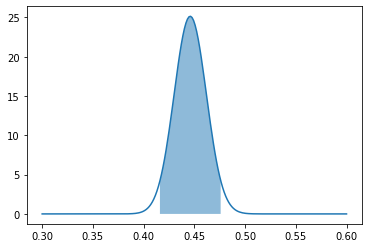

In [7]:

theta1=np.linspace(0.3,0.6,200)
theta2=np.linspace(interval[0],interval[1],200)
bd=stats.beta.pdf(theta1,438,544)
bd2=stats.beta.pdf(theta2,438,544)

fig, ax = plt.subplots()
ax.plot(theta1,bd)
ax.fill_between(theta2, bd2, alpha=0.5)
plt.show()

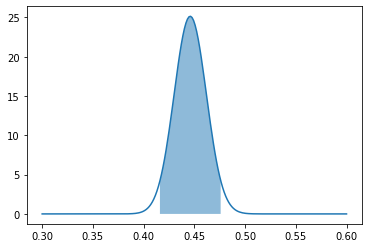

In [8]:
fig

## Conjugate priors

For binomial likelihood Beta is its conjugate. We can encode our knowledge (mean value of whole population) using the following relationships:

- mean of $\mathrm{Beta}(\alpha,\beta)$ distribution is $\frac{\alpha}{\alpha+\beta}$
- interpreting Beta, as previous binomial experiments then $\alpha+\beta$ is the population size
- we can try to do computation using various population sizes keeping mean of $0.485$

In [10]:
sizes=[2, 5, 10, 20, 100, 200, 1000]
post_median=[]
post_hpd=[]
alphas=[]
betas=[]
for n in sizes:
    alpha=0.485*n
    beta=n-alpha
    alphas.append(alpha)
    betas.append(beta)
    post_samples=np.random.beta(438+alpha,544+beta,1000)
    post_median.append(np.median(post_samples))
    post_hpd.append(az.hdi(post_samples,0.94))


In [11]:
import pandas as pd
df=pd.DataFrame({'Population size':sizes,
                 'Posterior median':post_median,
                 'Posterior 94% credible interval':post_hpd})

In [12]:
df.head(7)

,Population size,Posterior median,Posterior 94% credible interval
0,2,0.446429,"[0.4144847065876194, 0.47444481014315626]"
1,5,0.445706,"[0.41461637845804045, 0.47567394656086126]"
2,10,0.446182,"[0.41564827839177565, 0.47519065116467646]"
3,20,0.445831,"[0.41842096080499497, 0.47557166309718013]"
4,100,0.448541,"[0.42086019030459254, 0.47626062987793105]"
5,200,0.452210,"[0.42334691862965107, 0.4763137420761648]"
6,1000,0.465782,"[0.4459358992754644, 0.4873422832268561]"


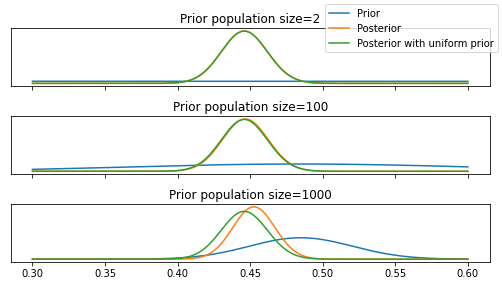

In [21]:
f, (ax1, ax2,ax3) = plt.subplots(3, 1, sharex=True,figsize=(7,4),tight_layout=True)
ax1.plot(theta1,stats.beta.pdf(theta1,alphas[0],betas[0]),theta1, stats.beta.pdf(theta1,438+alphas[0],544+betas[0]),theta1, stats.beta.pdf(theta1,438,544))
ax1.set_title('Prior population size='+str(sizes[0]))
ax1.set_yticks([])
ax2.plot(theta1,stats.beta.pdf(theta1,alphas[3],betas[3]),theta1, stats.beta.pdf(theta1,438+alphas[3],544+betas[3]),theta1, stats.beta.pdf(theta1,438,544))
ax2.set_title('Prior population size='+str(sizes[4]))
ax2.set_yticks([])
ax3.plot(theta1,stats.beta.pdf(theta1,alphas[5],betas[5]),theta1, stats.beta.pdf(theta1,438+alphas[5],544+betas[5]),theta1, stats.beta.pdf(theta1,438,544))
ax3.set_title('Prior population size='+str(sizes[6]))
ax3.set_yticks([])
f.legend(['Prior','Posterior','Posterior with uniform prior'],loc=1)
plt.show()

In [ ]:
f

## Non-conjugate prior


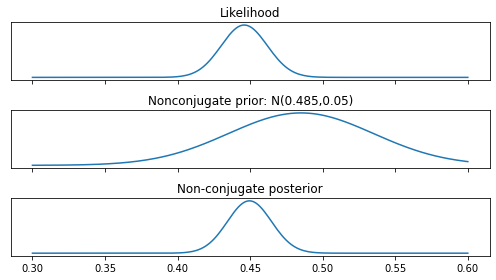

In [20]:
f2, (ax1, ax2,ax3) = plt.subplots(3, 1, sharex=True,figsize=(7,4),tight_layout=True)

ax1.plot(theta1, stats.beta.pdf(theta1,438,544))
ax1.set_title('Likelihood')
ax2.plot(theta1,stats.norm.pdf(theta1,0.485,0.05))
ax2.set_title('Nonconjugate prior: N(0.485,0.05)')
post=stats.beta.pdf(theta1,438,544)*stats.norm.pdf(theta1,0.485,0.05)
post=post/np.sum(post)
ax3.plot(theta1, post)
ax3.set_title('Non-conjugate posterior')
ax1.set_yticks([])
ax2.set_yticks([])
ax3.set_yticks([])
plt.show()

